In [1]:
%load_ext autoreload
%autoreload 2

# Load and plot measurements of WB417. Compare with model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pvcircuit as pvc
import ipywidgets as widgets
#%matplotlib inline
#import ipympl
%matplotlib widget

Tandems version 0.989
Data path is:  /Users/jgeisz/opt/anaconda3/envs/pvdev/lib/python3.9/site-packages/tandems/data/


In [3]:
# data iv3T vs V
path = pvc.datapath
fileA = 'WB417n8_Cpapy_CZ_JA.csv'
fileB = 'WB417n8_Cpapy_CZ_JB.csv'
WB417_CZ_V_dataiv = pvc.IV3T.loadcsv('WB417_CZ_V_dataiv',path,fileA,fileB,'V','CZ') 
# data iv3T vs I
fileA = 'WB417n8_Cpapy_CZ_VA.csv'
fileB = 'WB417n8_Cpapy_CZ_VB.csv'
WB417_CZ_I_dataiv = pvc.IV3T.loadcsv('WB417_CZ_I_dataiv',path,fileA,fileB,'I','CZ') 

In [4]:
# model
WB417dev3T = pvc.Tandem3T()
WB417dev3T.set(name='WB417dev3T', Rz = 2.3)
WB417dev3T.top.set(Eg=1.87, J0ratio=[ 80., 22.], Jext=0.0131, Gsh=1e-8)   
WB417dev3T.bot.set(Eg=1.419, J0ratio=[10., 15.], Jext=0.0128, Gsh= 5e-5,pn=1)
WB417dev3T.bot.set(Rser=0.2, beta=5, area=0.89)
# special points of model
WB417_CZ_fitsp = WB417dev3T.specialpoints(meastype = 'CZ')  # calculate special points of fit
WB417_CZ_fitsp.set(name='WB417_CZ_V_fitsp')
WB417_CZ_fitsp
pltargs={'lw':0, 'ms':7, 'mew':1, 'mec':'black', 'marker':'o', 'label':'fitsp', 'zorder':5}

In [5]:
# iv3T of model vs V
#WB417_CZ_V_fitiv = WB417_CZ_V_dataiv.copy() # use same range
#WB417_CZ_V_fitiv.set(name='WB417_CZ_V_fitiv', meastype = 'CZ')
#WB417dev3T.I3Trel(WB417_CZ_V_fitiv)  # calculate fit
# iv3T of model vs I
#WB417_CZ_I_fitiv = WB417_CZ_I_dataiv.copy() # use same range
#WB417_CZ_I_fitiv.set(name='WB417_CZ_I_fitiv', meastype = 'CZ')
#WB417dev3T.I3Trel(WB417_CZ_I_fitiv)  # calculate fit

In [6]:
#Vdataplot = WB417_CZ_V_dataiv.plot()  #plot data
#Vax, Vobjs = WB417_CZ_V_fitiv.plot(inplot = Vdataplot, cmap=None, ccont='red')  # plot model in red on data in black
#WB417_CZ_fitsp.addpoints(Vax, 'red' )

In [7]:
#Vhexargs = {'xkey':'Vxhex', 'ykey':'Vyhex'}
#Vhdataplot = WB417_CZ_V_dataiv.plot(**Vhexargs)  #plot data
#Vhax, Vhobjs = WB417_CZ_V_fitiv.plot(inplot = Vhdataplot, cmap=None, ccont='red', **Vhexargs)  # plot model in red on data in black
#WB417_CZ_fitsp.addpoints(Vhax,'red', **Vhexargs )

In [8]:
#Idataplot = WB417_CZ_I_dataiv.plot()  #plot data
#Iax, Iobjs = WB417_CZ_I_fitiv.plot(inplot = Idataplot, cmap=None, ccont='red')  # plot model in red on data in black
#WB417_CZ_fitsp.addpoints(Iax, 'red', 'IA', 'IB' )

In [9]:
#Ihexargs = {'xkey':'Ixhex', 'ykey':'Iyhex'}
#Ihdataplot = WB417_CZ_I_dataiv.plot(**Ihexargs)  #plot data
#Ihax, Ihobjs = WB417_CZ_I_fitiv.plot(inplot = Ihdataplot, cmap=None, ccont='red', **Ihexargs)  # plot model in red on data in black
#WB417_CZ_fitsp.addpoints(Ihax, 'red', **Ihexargs )

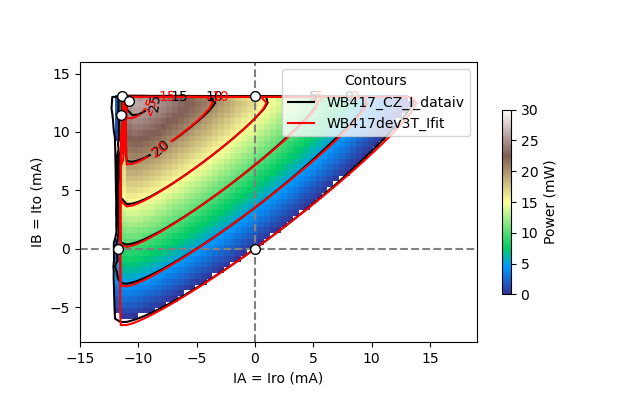

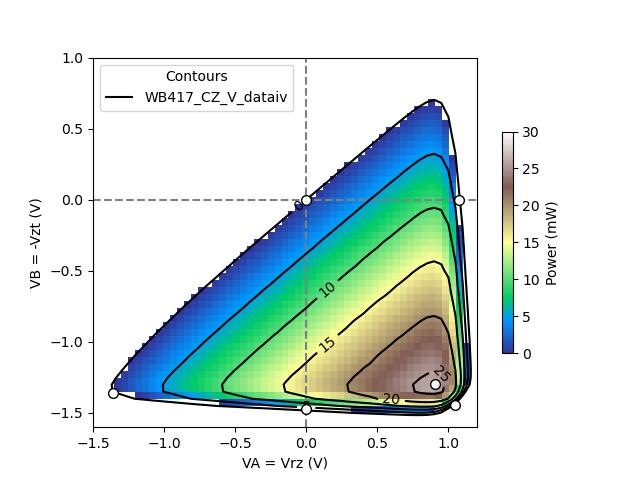

In [10]:
ui, Vax, Iax = WB417dev3T.controls(WB417_CZ_V_dataiv, WB417_CZ_I_dataiv, hex=False)
ui

In [11]:
VM21, MPP21 = WB417dev3T.VM(2,1)
MPP21.addpoints(Vax,'VA','VB', **pltargs)
MPP21.addpoints(Iax,'IA','IB', **pltargs)
VM21.addpoints(Vax,'VA','VB')
VM21.addpoints(Iax,'IA','IB')
MPP21

MPP21: <pvcircuit.iv3T.IV3T class>
{'name': 'MPP21', 'meastype': 'CZ', 'shape': (1,)}
sizes(1, 1)

 #     mIro     mIzo     mIto     Vzt      Vrz      Vtr      mIA      mIB       VA       VB     mPtot    mIxhex   mIyhex   Vxhex    Vyhex  
(0,) -11.36    -1.10    12.44    1.318    0.659   -1.976   -11.36    12.44    0.659   -1.318    23.88   -16.83    -1.26    2.329    0.761  

In [12]:
VM32, MPP32 = WB417dev3T.VM(3,2)
MPP32.addpoints(Vax,'VA','VB', **pltargs)
MPP32.addpoints(Iax,'IA','IB', **pltargs)
VM32.addpoints(Vax,'VA','VB')
VM32.addpoints(Iax,'IA','IB')
MPP32

MPP32: <pvcircuit.iv3T.IV3T class>
{'name': 'MPP32', 'meastype': 'CZ', 'shape': (1,)}
sizes(1, 1)

 #     mIro     mIzo     mIto     Vzt      Vrz      Vtr      mIA      mIB       VA       VB     mPtot    mIxhex   mIyhex   Vxhex    Vyhex  
(0,) -11.05    -1.47    12.50    1.313    0.875   -2.188   -11.05    12.50    0.875   -1.313    26.07   -16.65    -1.69    2.475    1.010  

In [13]:
VM11, MPP11 = WB417dev3T.VM(1,1)
MPP11.addpoints(Vax,'VA','VB', **pltargs)
MPP11.addpoints(Iax,'IA','IB', **pltargs)
VM11.addpoints(Vax,'VA','VB')
VM11.addpoints(Iax,'IA','IB')
MPP11

MPP11: <pvcircuit.iv3T.IV3T class>
{'name': 'MPP11', 'meastype': 'CZ', 'shape': (1,)}
sizes(1, 1)

 #     mIro     mIzo     mIto     Vzt      Vrz      Vtr      mIA      mIB       VA       VB     mPtot    mIxhex   mIyhex   Vxhex    Vyhex  
(0,) -10.08    -3.01    13.10    0.949    0.949   -1.898   -10.08    13.10    0.949   -0.949    22.00   -16.39    -3.48    2.014    1.096  

In [14]:
VM41, MPP41 = WB417dev3T.VM(4,1)
MPP41.addpoints(Vax,'VA','VB', **pltargs)
MPP41.addpoints(Iax,'IA','IB', **pltargs)
VM41.addpoints(Vax,'VA','VB')
VM41.addpoints(Iax,'IA','IB')
MPP41

MPP41: <pvcircuit.iv3T.IV3T class>
{'name': 'MPP41', 'meastype': 'CZ', 'shape': (1,)}
sizes(1, 1)

 #     mIro     mIzo     mIto     Vzt      Vrz      Vtr      mIA      mIB       VA       VB     mPtot    mIxhex   mIyhex   Vxhex    Vyhex  
(0,) -11.38    -1.15    12.51    1.313    0.328   -1.641   -11.38    12.51    0.328   -1.313    20.15   -16.89    -1.31    2.088    0.379  

In [15]:
CM, MPPCM = WB417dev3T.CM()
MPPCM.addpoints(Vax,'VA','VB', **pltargs)
MPPCM.addpoints(Iax,'IA','IB', **pltargs)
CM.addpoints(Vax,'VA','VB')
CM.addpoints(Iax,'IA','IB')
MPPCM

MPPCM: <pvcircuit.iv3T.IV3T class>
{'name': 'MPPCM', 'meastype': 'CZ', 'shape': (1,)}
sizes(1, 1)

 #     mIro     mIzo     mIto     Vzt      Vrz      Vtr      mIA      mIB       VA       VB     mPtot    mIxhex   mIyhex   Vxhex    Vyhex  
(0,) -11.09    0.00     11.09    1.370    0.867   -2.238   -11.09    11.09    0.867   -1.370    24.82   -15.69    -0.00    2.551    1.002  